# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
pip install palmerpenguins

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins = penguins.dropna()
penguins_dummified = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

X = penguins_dummified.drop(columns=['bill_depth_mm'])
y = penguins_dummified['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

penguins_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

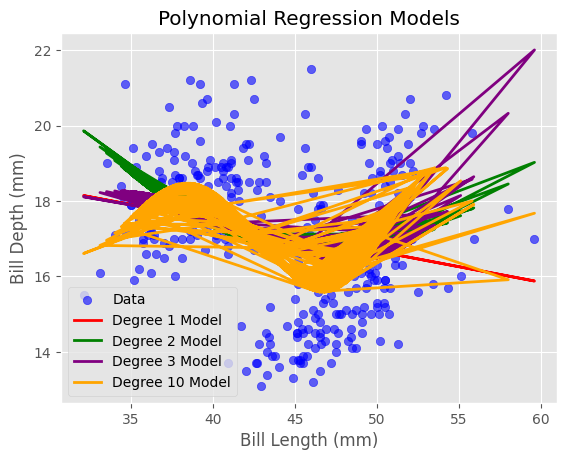

In [4]:
# Code Here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from palmerpenguins import load_penguins
from matplotlib import style

style.use('ggplot')

penguins = load_penguins()
penguins = penguins.dropna()

X = penguins[['bill_length_mm']]
y = penguins['bill_depth_mm']

plt.scatter(X, y, color='blue', label='Data', alpha=0.6)

degrees = [1, 2, 3, 10]
colors = ['red', 'green', 'purple', 'orange']

for degree, color in zip(degrees, colors):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    plt.plot(X, y_pred, color=color, label=f'Degree {degree} Model', linewidth=2)

plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.title('Polynomial Regression Models')
plt.show()


* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

Underfitting:
The Degree 1 Model (Linear) is underfitting the data.

Evidence: It fails to capture the curvature and patterns of the data, resulting in a straight line that oversimplifies the relationship between bill_length_mm and bill_depth_mm.

Overfitting:
The Degree 10 Model is overfitting the data.

Evidence: The model exhibits excessive oscillations, trying to fit every single data point, which introduces unnecessary complexity and makes it less generalizable to new data.

Best Fit:
The Degree 2 or Degree 3 Model seems to fit the data best.

Evidence: These models capture the general trend and curvature in the data without introducing excessive complexity or oscillations. They balance bias and variance effectively.